# Task 1: Performing all of the below codes of Overfitting, Cross Validation, etc.

## Program for understanding Overfitting and Underfitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
def true_fun(X):
    #return np.cos(1.5 * np.pi * X)
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

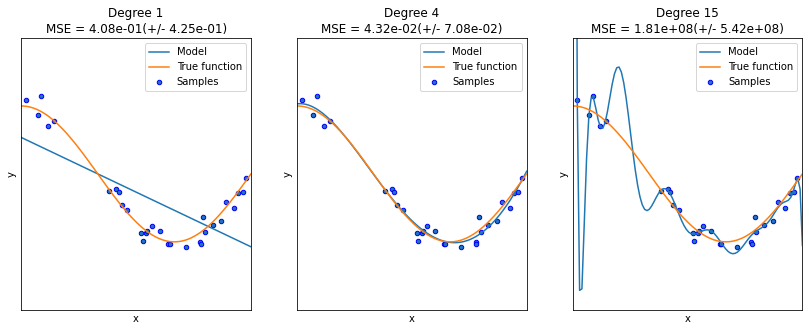

In [ ]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Overfitting

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [ ]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [ ]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.763, test: 0.767
>2, train: 0.804, test: 0.805
>3, train: 0.871, test: 0.868
>4, train: 0.906, test: 0.890
>5, train: 0.924, test: 0.901
>6, train: 0.937, test: 0.912
>7, train: 0.947, test: 0.917
>8, train: 0.956, test: 0.914
>9, train: 0.966, test: 0.917
>10, train: 0.975, test: 0.911
>11, train: 0.981, test: 0.913
>12, train: 0.985, test: 0.909
>13, train: 0.990, test: 0.909
>14, train: 0.993, test: 0.907
>15, train: 0.995, test: 0.905
>16, train: 0.996, test: 0.910
>17, train: 0.997, test: 0.908
>18, train: 0.998, test: 0.904
>19, train: 0.999, test: 0.905
>20, train: 0.999, test: 0.903
>21, train: 1.000, test: 0.902
>22, train: 1.000, test: 0.905
>23, train: 1.000, test: 0.903
>24, train: 1.000, test: 0.901
>25, train: 1.000, test: 0.901
>26, train: 1.000, test: 0.906
>27, train: 1.000, test: 0.905
>28, train: 1.000, test: 0.900
>29, train: 1.000, test: 0.900
>30, train: 1.000, test: 0.908


# -------------------------------------------------------------------------------------------------------------

# Cross-validation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

### Basic method to compute score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

### Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)



In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### Using the different scoring parameter

In [ ]:
from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Specified multiple metrics of predefined scorer names

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Calculate cross validation score by passing a cross validation iterator 

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

### Use an iterable yielding (train, test) splits as arrays of indices

In [ ]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

## Different type of Cross validation iterators


### K-fold


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]


### Repeated K-Fold

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))



[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# -------------------------------------------------------------------------------------------------------------


# Validation curve

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

%cd /content/drive/MyDrive/
#%ls

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_comb = df_train.append(df_test)

X = pd.DataFrame()


In [ ]:
def encode_sex(x):
    return 1 if x == 'female' else 0

def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Sex'] = df_comb.Sex.map(encode_sex)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [ ]:
fare_median = df_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)

In [ ]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))


In [ ]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived


In [ ]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [ ]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [ ]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

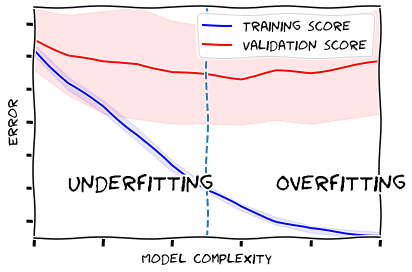

In [ ]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))


# -------------------------------------------------------------------------------------------------------------


# ROC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

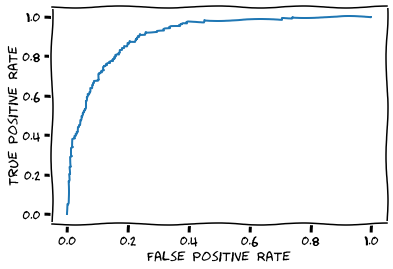

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Task 3: Using the given Cross Validation iterators perform all types of Cross Validations we did in the task :
	
###             1) K-fold
###             2) Repeated K-Fold
###             3) Leave One Out (LOO)

## Apart from this three, try to perform validation using three new iterators.

**leave P groups out**

In [ ]:
#leave P groups out
from sklearn.model_selection import LeavePGroupsOut

X = np.arange(6)
y = [1, 2, 3, 4, 5, 6]
groups = [1, 2, 3, 4, 5, 6]
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[2 3 4 5] [0 1]
[1 3 4 5] [0 2]
[1 2 4 5] [0 3]
[1 2 3 5] [0 4]
[1 2 3 4] [0 5]
[0 3 4 5] [1 2]
[0 2 4 5] [1 3]
[0 2 3 5] [1 4]
[0 2 3 4] [1 5]
[0 1 4 5] [2 3]
[0 1 3 5] [2 4]
[0 1 3 4] [2 5]
[0 1 2 5] [3 4]
[0 1 2 4] [3 5]
[0 1 2 3] [4 5]


**monte Carlo**

In [ ]:
#monte Carlo
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


**group shuffle split**

In [ ]:
#group shuffle split
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001]
y = ["a", "b", "b", "b", "c", "c", "c", "a"]
groups = [1, 1, 2, 2, 3, 3, 4, 4]
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3] [4 5 6 7]
[2 3 6 7] [0 1 4 5]
[2 3 4 5] [0 1 6 7]
[4 5 6 7] [0 1 2 3]


# Task 4: With the help of the given code and references complete all of the following step:
  
###            1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
###            2) Try to resolve the overfitting.
###            3) Calculate the Validation score by any two or three given techniques and Validation iterators.
###           4) Generate the validation curve 
###           5) Predict the output of testing data.
###           6) Generate the ROC curve using the predicted data and actual data.

## Overfitting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#loading flower dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 PosixPath('datasets/flower_photos/daisy/5794839_200acd910c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/163978992_8128b49d3e_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3703643767_dee82cdef9_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4851353993_2cbbbd1040_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/5717319579_190e85c7d1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14176042519_5792b37555.jpg')]

Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/5717319579_190e85c7d1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14176042519_5792b37555.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(249, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Build convolutional neural network and train it

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 81s 934ms/step - loss: 1.3124 - accuracy: 0.4331
Epoch 2/30
86/86 [==============================] - 78s 903ms/step - loss: 0.9756 - accuracy: 0.6177
Epoch 3/30
86/86 [==============================] - 83s 970ms/step - loss: 0.7873 - accuracy: 0.7053
Epoch 4/30
86/86 [==============================] - 79s 919ms/step - loss: 0.5957 - accuracy: 0.7802
Epoch 5/30
86/86 [==============================] - 80s 931ms/step - loss: 0.4042 - accuracy: 0.8557
Epoch 6/30
86/86 [==============================] - 85s 993ms/step - loss: 0.2470 - accuracy: 0.9161
Epoch 7/30
86/86 [==============================] - 79s 924ms/step - loss: 0.1312 - accuracy: 0.9626
Epoch 8/30
86/86 [==============================] - 78s 909ms/step - loss: 0.0521 - accuracy: 0.9862
Epoch 9/30
86/86 [==============================] - 80s 925ms/step - loss: 0.0331 - accuracy: 0.9916
Epoch 10/30
86/86 [==============================] - 80s 930ms/step - loss: 0.0236 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 319ms/step - loss: 3.2096 - accuracy: 0.6057


[3.209641695022583, 0.6056644916534424]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (61.11%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 16s 534ms/step


array([[ -8.028877  ,   1.108018  ,   8.5991    ,  -3.18028   ,
          3.4896388 ],
       [  6.3439217 ,  -2.4405665 , -24.24442   ,   2.8412762 ,
          6.2444754 ],
       [ -4.8055162 ,   1.1593833 ,  12.739833  ,  -7.3384666 ,
         -7.2103515 ],
       ...,
       [-15.905122  ,  -8.402873  ,   7.184141  ,   7.669196  ,
         -2.1687646 ],
       [ -5.7542095 ,   2.5285354 ,  -8.816611  ,   9.15464   ,
         -3.5652966 ],
       [-19.959421  ,  -8.861323  ,  -1.0014709 ,  18.050295  ,
          0.49005833]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

1

Improve Test Accuracy Using Data Augmentation

In [ ]:

batch_size = 32
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 122s 1s/step - loss: 1.2957 - accuracy: 0.4528
Epoch 2/30
86/86 [==============================] - 113s 1s/step - loss: 1.0335 - accuracy: 0.5901
Epoch 3/30
86/86 [==============================] - 94s 1s/step - loss: 0.9161 - accuracy: 0.6512
Epoch 4/30
86/86 [==============================] - 91s 1s/step - loss: 0.8413 - accuracy: 0.6777
Epoch 5/30
86/86 [==============================] - 91s 1s/step - loss: 0.7637 - accuracy: 0.7068
Epoch 6/30
86/86 [==============================] - 91s 1s/step - loss: 0.7370 - accuracy: 0.7177
Epoch 7/30
86/86 [==============================] - 90s 1s/step - loss: 0.6759 - accuracy: 0.7395
Epoch 8/30
86/86 [==============================] - 91s 1s/step - loss: 0.6430 - accuracy: 0.7500
Epoch 9/30
86/86 [==============================] - 90s 1s/step - loss: 0.6276 - accuracy: 0.7547
Epoch 10/30
86/86 [==============================] - 92s 1s/step - loss: 0.6116 - accuracy: 0.7631
Epoch 11/30
86/86

**using data augmentation and drop out layer we can see the accuracy of test set predictions is increased to 72.77%**

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 265ms/step - loss: 1.0108 - accuracy: 0.7277


[1.010751485824585, 0.727668821811676]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
for image_batch, labels_batch in train_ds:
      print(image_batch.shape)
      print(labels_batch.shape)
      break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99593824


In [ ]:
num_classes = len(class_names)

vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

553467096/553467096 [==============================] - 8s 0us/step


In [ ]:
print(len(model.layers))
model.summary()

22
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [21]:
print(len(model.layers)) 


24


In [22]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(1000, activation = 'softmax'))    
model.add(Dense(5, activation = 'softmax'))

print(len(model.layers)) 

26


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 1733s 19s/step - loss: 1.6066 - accuracy: 0.2299 - val_loss: 1.6045 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 1709s 19s/step - loss: 1.6028 - accuracy: 0.2459 - val_loss: 1.6025 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 1690s 18s/step - loss: 1.6010 - accuracy: 0.2459 - val_loss: 1.6021 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 1690s 18s/step - loss: 1.6003 - accuracy: 0.2459 - val_loss: 1.6019 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 1691s 18s/step - loss: 1.6002 - accuracy: 0.2459 - val_loss: 1.6018 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 1691s 18s/step - loss: 1.6000 - accuracy: 0.2459 - val_loss: 1.6019 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 1715s 19s/step - loss: 1.6000 - accuracy: 0.2459 - val_loss: 1.6017 - val_accuracy: 0.2398

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


**Validation Curve**

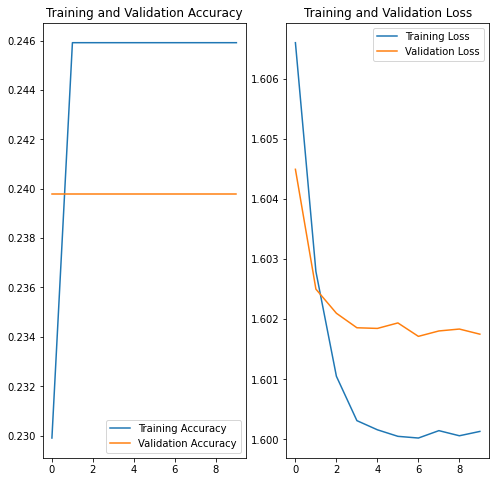

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns   

In [30]:
data_file='https://raw.githubusercontent.com/vappiah/Machine-Learning-Tutorials/main/datasets/malaria_clin_data.csv'
dataframe=pd.read_csv(data_file)
subset=dataframe.iloc[:,16:]
subset.isnull().sum()
subset.dropna(inplace=True)

In [32]:
labels=pd.Categorical(subset['Clinical_Diagnosis'])
subset.iloc[:,1:].describe().transpose()
X=subset.iloc[:,1:]
y=subset.iloc[:,0]
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

**ROC**

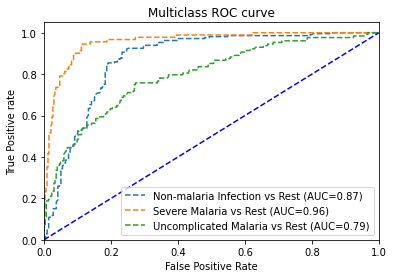

In [33]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()